In [1]:
import tensorflow
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# Building CNN Model:

In [4]:
tensorflow.test.is_gpu_available()

2023-02-09 05:16:32.945333: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-09 05:16:33.007804: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-09 05:16:33.155991: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-09 05:16:33.156825: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

True

In [5]:
tensorflow.config.list_physical_devices('GPU')

2023-02-09 05:16:35.337426: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-09 05:16:35.338448: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-09 05:16:35.339391: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
labels = os.listdir("../input/drowsiness-dataset/train")

In [7]:
labels

['Closed', 'Open', 'yawn', 'no_yawn']

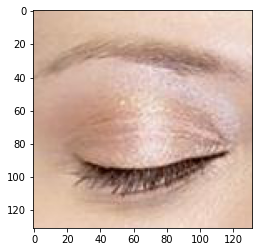

In [8]:
plt.imshow(plt.imread("../input/drowsiness-dataset/train/Closed/_2.jpg"))

In [9]:
a = plt.imread("../input/drowsiness-dataset/train/yawn/10.jpg")

In [10]:
a

array([[[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [157, 165, 178],
        [156, 164, 177],
        [156, 164, 177]],

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [155, 163, 176],
        [155, 163, 176],
        [155, 163, 176]],

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [154, 162, 175],
        [154, 162, 175],
        [155, 163, 176]]

In [11]:
a.shape

(480, 640, 3)

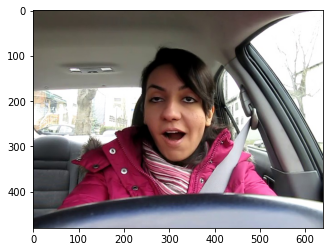

In [12]:
plt.imshow(plt.imread("../input/drowsiness-dataset/train/yawn/5.jpg"))

In [13]:
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split= 0.2)

In [14]:
train_data = train_data_gen.flow_from_directory("../input/drowsiness-dataset/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset='training')

Found 2321 images belonging to 4 classes.


In [15]:
validation_data = train_data_gen.flow_from_directory("../input/drowsiness-dataset/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset= 'validation')

Found 579 images belonging to 4 classes.


In [16]:
test_data_gen = ImageDataGenerator(rescale=1./255)

In [17]:
test_data = test_data_gen.flow_from_directory("../input/drowsiness-dataset/train",
                                target_size=(80,80),batch_size=8,class_mode='categorical')

Found 2900 images belonging to 4 classes.


In [18]:
train_data

In [19]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [20]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu",input_shape=(80,80,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

2023-02-09 05:16:37.256376: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-09 05:16:37.257290: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-09 05:16:37.257925: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-09 05:16:37.258610: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-09 05:16:37.259244: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [21]:
model.build(input_shape=(80, 80, 3))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          1

In [23]:
validation_steps = len(test_data)
validation_steps

363

In [24]:
hist = model.fit(train_data, epochs=55, validation_data = test_data, shuffle=True, validation_steps = len(test_data))

2023-02-09 05:16:37.917419: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/55


2023-02-09 05:16:39.489272: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


291/291 [==============================] - 51s 151ms/step - loss: 0.8573 - accuracy: 0.5683 - val_loss: 0.4394 - val_accuracy: 0.7624
Epoch 2/55
291/291 [==============================] - 25s 86ms/step - loss: 0.4283 - accuracy: 0.7928 - val_loss: 0.3695 - val_accuracy: 0.8190
Epoch 3/55
291/291 [==============================] - 25s 88ms/step - loss: 0.3602 - accuracy: 0.8208 - val_loss: 0.3406 - val_accuracy: 0.8359
Epoch 4/55
291/291 [==============================] - 25s 87ms/step - loss: 0.3421 - accuracy: 0.8410 - val_loss: 0.3241 - val_accuracy: 0.8448
Epoch 5/55
291/291 [==============================] - 25s 88ms/step - loss: 0.3064 - accuracy: 0.8583 - val_loss: 0.3234 - val_accuracy: 0.8545
Epoch 6/55
291/291 [==============================] - 26s 89ms/step - loss: 0.2847 - accuracy: 0.8794 - val_loss: 0.2871 - val_accuracy: 0.8769
Epoch 7/55
291/291 [==============================] - 25s 85ms/step - loss: 0.2638 - accuracy: 0.8845 - val_loss: 0.2437 - val_accuracy: 0.9038
Ep

In [25]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))

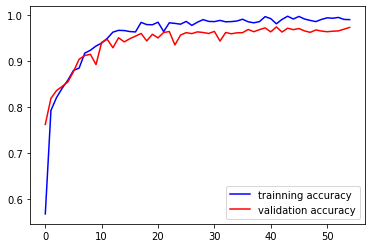

In [26]:
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

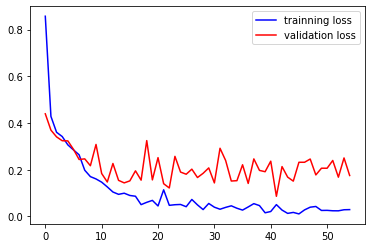

In [27]:
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [28]:
model.save("drowiness.h5")

In [29]:
model.save("drowiness.model")

2023-02-09 05:40:53.310728: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


# Drowsiness Main

In [30]:
#pip install pillow

In [31]:
from keras.models import load_model
import cv2
from PIL import Image
from keras.preprocessing import image
import numpy as np

In [32]:
model = load_model('drowiness.h5')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          1

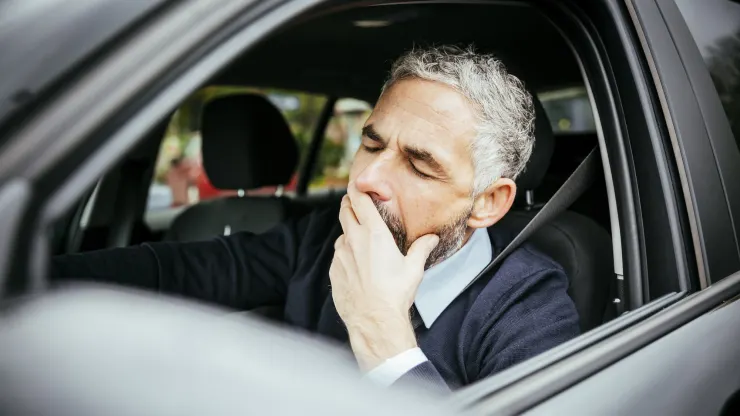

In [34]:
Image.open("/kaggle/input/drowsiness-image-sample/121.jpg")

In [35]:
image_size = (80, 80)

In [36]:
img = Image.open("/kaggle/input/drowsiness-image-sample/121.jpg").resize(image_size)

In [37]:
img = np.array(img)/255.0

In [38]:
img.shape

(80, 80, 3)

In [39]:
result = model.predict(img[np.newaxis, ...])

In [40]:
result.shape

(1, 4)

In [41]:
result

array([[5.7072475e-07, 2.4626499e-05, 6.0653783e-02, 9.3932098e-01]],
      dtype=float32)

In [42]:
predicted_label_index = np.argmax(result)

In [43]:
if (predicted_label_index==0):
    print('Closed eyes')
    
elif predicted_label_index==1:
    print('No Yawn Detected')
    
elif predicted_label_index==2:
    print('Open eyes')
    
elif predicted_label_index==3:
    print('Yawn Detected')

Yawn Detected


In [44]:
if (predicted_label_index==0) & (predicted_label_index==3):
    print('Drowsiness Detected')

elif (predicted_label_index==3):
    print('Drowsiness Detected')

elif predicted_label_index==2 & (predicted_label_index==3):
    print('Drowsiness Detected')

elif (predicted_label_index==1) & (predicted_label_index==2):
    print('No Drowsiness Detected')
    
elif predicted_label_index==1:
    print('No Drowsiness Detected')

Drowsiness Detected


## <div style='color:#016CC9;text-align:center;font-size:100%'>Thank you for reading!<br>Please let me know if you have any questions or feedback 🙂</div>